<a href="https://colab.research.google.com/github/Nicolas-Nav/DeepLearning/blob/main/DLY0100_Entrega_CNN_Equipo1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Evaluación - Redes Convolucionales

**Autor:**

**Correo Electrónico:**

**Fecha de Creación:** Mayo de 2025

**Versión:** 1.0  

---

## Descripción

Este notebook contiene el desarrollo de la entrega 2 de la asignatura optativa de Deep Learning de DuocUC Sede Concepción

---

## Requisitos de Software

Este notebook fue desarrollado con Python 3.9. A continuación se listan las bibliotecas necesarias:

- tensorflow (2.18.0)

Para verificar la versión instalada ejecutar usando el siguiente comando, usando la librería de la cual quieres saber la versión:

```bash
import tensorflow as tf
print(tf.__version__)
````

# Entregable

Utilizando Convolutional Neural Networks con Keras, entrenar un clasificador que sea capaz de reconocer personajes en imágenes de los Simpsons con una accuracy en el dataset de test de **85%**. Redactar un informe analizando varias de las alternativas probadas y los resultados obtenidos.

A continuación se detallan una serie de aspectos orientativos que podrían ser analizados en el informe:

*   Análisis de los datos a utilizar.
*   Análisis de resultados, obtención de métricas de *precision* y *recall* por clase y análisis de qué clases obtienen mejores o peores resultados.
*   Análisis visual de los errores de la red. ¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?
*   Comparación de modelos CNNs con un modelo de Fully Connected para este problema.
*   Utilización de distintas arquitecturas CNNs, comentando aspectos como su profundidad, hiperparámetros utilizados, optimizador, uso de técnicas de regularización, *batch normalization*, entre otras.
*   [ *algo más difícil* ] Utilización de *data augmentation*. Esto puede conseguirse con la clase [ImageDataGenerator](https://keras.io/preprocessing/image/#imagedatagenerator-class) de Keras.

✅ **Notas**
* Recuerda partir los datos en training/validation para tener una buena estimación de los valores que el modelo tendrá en los datos de test, así como comprobar que no estamos cayendo en overfitting.
* No es necesario mostrar en el notebook las trazas de entrenamiento de todos los modelos entrenados, si bien una buena idea seria guardar gráficas de esos entrenamientos para el análisis. Sin embargo, **se debe mostrar el entrenamiento completo del mejor modelo obtenido y la evaluación de los datos de test con este modelo**.
* Las imágenes **no están normalizadas**. Hay que normalizarlas como se ha hecho en trabajos anteriores.
* El test set del problema tiene imágenes un poco más "fáciles", por lo que es posible encontrarse con métricas en el test set bastante mejores que en el training set.

# Descarga de la data

In [1]:
!wget -O simpsons_train.tar.gz https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr&st=b96sg8iu&dl=0

--2025-05-10 08:48:09--  https://www.dropbox.com/scl/fi/qkg3gs31xjbhv9jjqmot6/simpsons_train.tar.gz?rlkey=oqbofdqoqjrpmxjwxaphru0yr
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucbce5a34fb29497eeaa89ac395b.dl.dropboxusercontent.com/cd/0/inline/CpacWLBZRAcfdtHYvKdTpOduo8eBPxoRVtXSbEyKLuOsO_pvuSzAY7xTDF7kzy_7koZHHGVG-S3vwINDO-KakMqY4_nTq-44Szkmq68OSpO7BlxCPhhPhOL0EObjLNHoXqQUqk3XIvoQ5MiCx4xX6rPq/file# [following]
--2025-05-10 08:48:09--  https://ucbce5a34fb29497eeaa89ac395b.dl.dropboxusercontent.com/cd/0/inline/CpacWLBZRAcfdtHYvKdTpOduo8eBPxoRVtXSbEyKLuOsO_pvuSzAY7xTDF7kzy_7koZHHGVG-S3vwINDO-KakMqY4_nTq-44Szkmq68OSpO7BlxCPhhPhOL0EObjLNHoXqQUqk3XIvoQ5MiCx4xX6rPq/file
Resolving ucbce5a34fb29497eeaa89ac395b.dl.dropboxusercontent.com (ucbce5a34fb29497eeaa89ac395b.dl.dropboxusercontent.com)... 162.125.2.1

Los datos de entrenamiento estan en un archivo que está alojado en dropbox, un servicio de almacenamiento en la nube. Los descargamos para poder utilizarlo como datos de entrenamiento.

In [2]:
!wget -O simpsons_test.tar.gz https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni&st=qau98qns&dl=0

--2025-05-10 08:48:18--  https://www.dropbox.com/scl/fi/zche5dm3zgd9jysatnmka/simpsons_test.tar.gz?rlkey=iek183gc4t4w9mdnz1izhudni
Resolving www.dropbox.com (www.dropbox.com)... 162.125.2.18, 2620:100:6017:18::a27d:212
Connecting to www.dropbox.com (www.dropbox.com)|162.125.2.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf4ba323ab8e47de39a2d60f1d6.dl.dropboxusercontent.com/cd/0/inline/CpZZob-2LaNotMyDVzhvy5mf4ycHO0S4BGl4guE87lX_XFmghf8TuoIi0if7mcoBkzlECnTEl9eE8wy6uDsKLsgxsPtUeoKQfAtF8hYokCB5nc_ihtVnJiwxeiM_RlrSFlr0iNC-LqD1_PcpbGDBGxOE/file# [following]
--2025-05-10 08:48:19--  https://ucf4ba323ab8e47de39a2d60f1d6.dl.dropboxusercontent.com/cd/0/inline/CpZZob-2LaNotMyDVzhvy5mf4ycHO0S4BGl4guE87lX_XFmghf8TuoIi0if7mcoBkzlECnTEl9eE8wy6uDsKLsgxsPtUeoKQfAtF8hYokCB5nc_ihtVnJiwxeiM_RlrSFlr0iNC-LqD1_PcpbGDBGxOE/file
Resolving ucf4ba323ab8e47de39a2d60f1d6.dl.dropboxusercontent.com (ucf4ba323ab8e47de39a2d60f1d6.dl.dropboxusercontent.com)... 162.125.2.15

Los datos de prueba tambien estan en dropbox y los descargamos para poder utilixarlos como datos de prueba

In [3]:
!tar -xzvf simpsons_train.tar.gz

Se truncaron las últimas líneas 5000 del resultado de transmisión.
simpsons/mayor_quimby/pic_0116.jpg
simpsons/milhouse_van_houten/pic_0576.jpg
simpsons/lenny_leonard/pic_0149.jpg
simpsons/kent_brockman/pic_0446.jpg
simpsons/nelson_muntz/pic_0060.jpg
simpsons/krusty_the_clown/pic_0838.jpg
simpsons/homer_simpson/pic_0637.jpg
simpsons/homer_simpson/pic_0495.jpg
simpsons/krusty_the_clown/pic_0893.jpg
simpsons/homer_simpson/pic_0834.jpg
simpsons/homer_simpson/pic_0692.jpg
simpsons/lisa_simpson/pic_0755.jpg
simpsons/marge_simpson/pic_0654.jpg
simpsons/chief_wiggum/pic_0344.jpg
simpsons/lisa_simpson/pic_0952.jpg
simpsons/lisa_simpson/pic_1269.jpg
simpsons/marge_simpson/pic_0851.jpg
simpsons/marge_simpson/pic_1168.jpg
simpsons/chief_wiggum/pic_0541.jpg
simpsons/homer_simpson/pic_1948.jpg
simpsons/sideshow_bob/pic_0104.jpg
simpsons/lisa_simpson/pic_0278.jpg
simpsons/nelson_muntz/pic_0128.jpg
simpsons/marge_simpson/pic_0177.jpg
simpsons/milhouse_van_houten/pic_0699.jpg
simpsons/waylon_smithers/

los datos de entrenamientos se descomprimen con el !tar

Que significa -xzvf:

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

In [4]:
!tar -xzvf simpsons_test.tar.gz

simpsons_testset/charles_montgomery_burns_46.jpg
simpsons_testset/marge_simpson_35.jpg
simpsons_testset/abraham_grampa_simpson_9.jpg
simpsons_testset/krusty_the_clown_40.jpg
simpsons_testset/apu_nahasapeemapetilon_10.jpg
simpsons_testset/homer_simpson_24.jpg
simpsons_testset/lenny_leonard_17.jpg
simpsons_testset/marge_simpson_3.jpg
simpsons_testset/milhouse_van_houten_13.jpg
simpsons_testset/apu_nahasapeemapetilon_29.jpg
simpsons_testset/lenny_leonard_34.jpg
simpsons_testset/bart_simpson_27.jpg
simpsons_testset/ned_flanders_12.jpg
simpsons_testset/charles_montgomery_burns_3.jpg
simpsons_testset/milhouse_van_houten_30.jpg
simpsons_testset/apu_nahasapeemapetilon_46.jpg
simpsons_testset/mayor_quimby_3.jpg
simpsons_testset/kent_brockman_6.jpg
simpsons_testset/chief_wiggum_25.jpg
simpsons_testset/nelson_muntz_37.jpg
simpsons_testset/moe_szyslak_28.jpg
simpsons_testset/bart_simpson_44.jpg
simpsons_testset/homer_simpson_36.jpg
simpsons_testset/milhouse_van_houten_49.jpg
simpsons_testset/comic

los datos de prueba se descomprimen con el !tar

-x: extraer archivos.

-z: el archivo está comprimido con gzip (.gz).

-v: modo verbose, muestra los nombres de los archivos que se van extrayendo.

-f simpsons_train.tar.gz: el archivo sobre el que trabajas.

In [5]:
import cv2, os, pprint
import numpy as np
import keras
import glob
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import collections
import tensorflow as tf
import itertools

import keras
from google.colab.patches import cv2_imshow
from tensorflow.keras import layers
from tensorflow.keras import Model
from keras.models import Sequential
from keras.layers import Input, Dense, Activation , Dropout, Flatten, BatchNormalization, Conv2D, MaxPooling2D
from tensorflow.keras.optimizers import Adam, SGD, Adadelta
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split

from tensorflow.python.keras import backend as keras_backend

from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from collections import Counter
import random

from matplotlib import pyplot as plt
from keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Input

In [6]:
def load_train_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función carga los datos de training en imágenes.

    Como las imágenes tienen tamaños distintas, utilizamos la librería opencv
    para hacer un resize y adaptarlas todas a tamaño IMG_SIZE x IMG_SIZE.

    Args:
        dirname: directorio completo del que leer los datos
        map_characters: variable de mapeo entre labels y personajes
        verbose: si es True, muestra información de las imágenes cargadas

    Returns:
        X, y: X es un array con todas las imágenes cargadas con tamaño
                IMG_SIZE x IMG_SIZE
              y es un array con las labels de correspondientes a cada imagen
    """
    X_train = []
    y_train = []
    for label, character in map_characters.items():
        files = os.listdir(os.path.join(dirname, character))
        images = [file for file in files if file.endswith("jpg")]
        if verbose:
          print("Leyendo {} imágenes encontradas de {}".format(len(images), character))
        for image_name in images:
            image = cv2.imread(os.path.join(dirname, character, image_name))
            X_train.append(cv2.resize(image,(IMG_SIZE, IMG_SIZE)))
            y_train.append(label)
    return np.array(X_train), np.array(y_train)

def load_test_set(dirname : str, map_characters : np.array, verbose=True):
    """Esta función funciona de manera equivalente a la función load_train_set
    pero cargando los datos de test."""
    X_test = []
    y_test = []
    reverse_dict = {v: k for k, v in map_characters.items()}
    for filename in glob.glob(dirname + '/*.*'):
        char_name = "_".join(filename.split('/')[-1].split('_')[:-1])
        if char_name in reverse_dict:
            image = cv2.imread(filename)
            image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
            X_test.append(image)
            y_test.append(reverse_dict[char_name])
    if verbose:
        print("Leídas {} imágenes de test".format(len(X_test)))
    return np.array(X_test), np.array(y_test)

Este código define dos funciones, load_train_set y load_test_set, cuyo propósito es cargar imágenes desde un directorio (de entrenamiento o prueba), redimensionarlas a un tamaño uniforme (IMG_SIZE x IMG_SIZE) utilizando OpenCV, y convertirlas en arrays NumPy listos para ser usados en modelos de deep learning. La función load_train_set recorre las carpetas de cada personaje (clase), redimensiona sus imágenes .jpg y asocia cada una a su respectiva etiqueta numérica (label) según un diccionario map_characters. Por otro lado, load_test_set toma imágenes sueltas desde una carpeta de test, deduce a qué personaje pertenecen a partir del nombre del archivo, y les asigna la etiqueta correspondiente usando un diccionario invertido. Ambas funciones permiten visualizar detalles del proceso si el parámetro verbose está activado, y devuelven los arrays X (con imágenes) y Y (con etiquetas).

In [7]:
# Esta variable contiene un mapeo de número de clase a personaje.
# Se utilizan sólo los 18 personajes del dataset que tienen más imágenes.
MAP_CHARACTERS = {
    0: 'abraham_grampa_simpson', 1: 'apu_nahasapeemapetilon', 2: 'bart_simpson',
    3: 'charles_montgomery_burns', 4: 'chief_wiggum', 5: 'comic_book_guy', 6: 'edna_krabappel',
    7: 'homer_simpson', 8: 'kent_brockman', 9: 'krusty_the_clown', 10: 'lisa_simpson',
    11: 'marge_simpson', 12: 'milhouse_van_houten', 13: 'moe_szyslak',
    14: 'ned_flanders', 15: 'nelson_muntz', 16: 'principal_skinner', 17: 'sideshow_bob'
}

# Se estandarizan todas las imágenes a tamaño 64x64
IMG_SIZE = 64

El diccionario MAP_CHARACTERS define el mapeo entre clases numéricas y nombres de personajes, permitiendo convertir las etiquetas en valores entendibles por los modelos. Por otro lado, la constante IMG_SIZE = 64 asegura que todas las imágenes sean redimensionadas a 64x64 píxeles.

In [8]:
# Carga los datos
DATASET_TRAIN_PATH_COLAB = "simpsons"
DATASET_TEST_PATH_COLAB = "simpsons_testset"

X, y = load_train_set(DATASET_TRAIN_PATH_COLAB, MAP_CHARACTERS)
X_test, y_test = load_test_set(DATASET_TEST_PATH_COLAB, MAP_CHARACTERS)

Leyendo 913 imágenes encontradas de abraham_grampa_simpson
Leyendo 623 imágenes encontradas de apu_nahasapeemapetilon
Leyendo 1342 imágenes encontradas de bart_simpson
Leyendo 1193 imágenes encontradas de charles_montgomery_burns
Leyendo 986 imágenes encontradas de chief_wiggum
Leyendo 469 imágenes encontradas de comic_book_guy
Leyendo 457 imágenes encontradas de edna_krabappel
Leyendo 2246 imágenes encontradas de homer_simpson
Leyendo 498 imágenes encontradas de kent_brockman
Leyendo 1206 imágenes encontradas de krusty_the_clown
Leyendo 1354 imágenes encontradas de lisa_simpson
Leyendo 1291 imágenes encontradas de marge_simpson
Leyendo 1079 imágenes encontradas de milhouse_van_houten
Leyendo 1452 imágenes encontradas de moe_szyslak
Leyendo 1454 imágenes encontradas de ned_flanders
Leyendo 358 imágenes encontradas de nelson_muntz
Leyendo 1194 imágenes encontradas de principal_skinner
Leyendo 877 imágenes encontradas de sideshow_bob
Leídas 890 imágenes de test


*Agregar total imagen de cada conjunto


Se definen las rutas donde están almacenadas las imágenes: DATASET_TRAIN_PATH_COLAB para el set de entrenamiento (simpsons) y DATASET_TEST_PATH_COLAB para el de prueba (simpsons_testset). Luego, se llaman las funciones load_train_set y load_test_set con estas rutas y el diccionario MAP_CHARACTERS como parámetros. El resultado son cuatro arrays: X y y contienen las imágenes de entrenamiento y sus respectivas etiquetas, mientras que X_test y y_test contienen los datos de prueba. Estos arrays ya están preprocesados (redimensionados a 64x64 píxeles) y listos para ser usados en el entrenamiento y evaluación de un modelo de clasificación de imágenes.

##¿Qué tipo de imágenes o qué personajes dan más problemas al modelo?

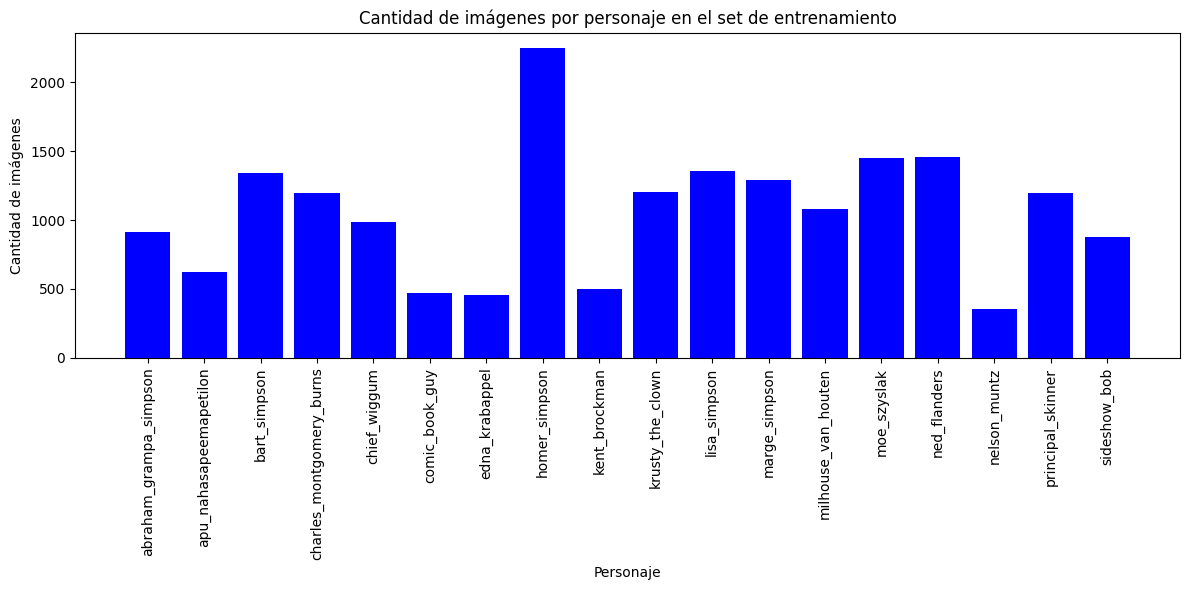

In [9]:
cantidad_por_personaje = collections.Counter(y)
nombres = [MAP_CHARACTERS[a] for a in cantidad_por_personaje.keys()]
cantidad = list(cantidad_por_personaje.values())

plt.figure(figsize=(12, 6))
plt.bar(nombres, cantidad, color='blue')
plt.xticks(rotation=90)
plt.title("Cantidad de imágenes por personaje en el set de entrenamiento")
plt.xlabel("Personaje")
plt.ylabel("Cantidad de imágenes")
plt.tight_layout()
plt.show()

Existe una mal distribucion de imagenes ya que hay algunas clases como la de homer_simpson las cuales se tiene mas de 2000 ejemplares y por otro lado clases como nelson_muntz las cuales no llegan ni a 500 imagenes, para mejorar la distribucion se se utilizara la tecnica de data augmentation la cual se basa en generar variadas imágenes a partir de una, estas nuevas imágenes consisten en variantes (rotada, volteada, escalada, entre otras opciones) lo que ayuda a entrenar modelos más robustos evitando, de esa forma, el overfitting.

*Agregar arriba: Una de las imagenes que mas problemas nos deberia dar son las que estan con menos de 500 ejemplares/imagenes ya que al contar con pocas el modelo tenderia a no identificarlas bien y dar otro resultado. Para resolver eso ocuparemos la tecnica de data augmentation (aqui unir)

In [10]:
# Crear el generador de aumento
datagen = ImageDataGenerator(
    rotation_range=15,         # Rango moderado, más seguro para rostros y figuras
    width_shift_range=0.1,     # Pequeños desplazamientos horizontales
    height_shift_range=0.1,    # Pequeños desplazamientos verticales
    shear_range=0.05,          # Inclinaciones leves para no distorsionar caras
    zoom_range=0.1,            # Zoom leve para variar escala
    horizontal_flip=True,      # Muy útil si el personaje se ve igual al voltearse
    fill_mode='nearest'        # Mantiene continuidad visual al rellenar bordes
)

# Contar imágenes por clase
class_counts = Counter(y)
max_count = max(class_counts.values())
print("Distribución original:", class_counts)

X_augmented = []
y_augmented = []

for class_label, count in class_counts.items():
    if count < max_count:
        n_to_generate = max_count - count
        print(f"Aumentando clase {class_label} ({MAP_CHARACTERS[class_label]}): generando {n_to_generate} imágenes...")

        # Obtener solo las imágenes de esta clase
        class_indices = np.where(y == class_label)[0]
        class_images = X[class_indices]

        # Elegir imágenes aleatorias para aumentar
        for _ in range(n_to_generate):
            img = random.choice(class_images)
            img = np.expand_dims(img, axis=0)
            augmented_img = next(datagen.flow(img, batch_size=1))[0].astype('uint8')
            X_augmented.append(augmented_img)
            y_augmented.append(class_label)

# Combinar datos originales + aumentados
X = np.concatenate([X, np.array(X_augmented)], axis=0)
y = np.concatenate([y, np.array(y_augmented)], axis=0)

# Verificar nueva distribución
print("Nueva distribución balanceada:", Counter(y))

Distribución original: Counter({np.int64(7): 2246, np.int64(14): 1454, np.int64(13): 1452, np.int64(10): 1354, np.int64(2): 1342, np.int64(11): 1291, np.int64(9): 1206, np.int64(16): 1194, np.int64(3): 1193, np.int64(12): 1079, np.int64(4): 986, np.int64(0): 913, np.int64(17): 877, np.int64(1): 623, np.int64(8): 498, np.int64(5): 469, np.int64(6): 457, np.int64(15): 358})
Aumentando clase 0 (abraham_grampa_simpson): generando 1333 imágenes...
Aumentando clase 1 (apu_nahasapeemapetilon): generando 1623 imágenes...
Aumentando clase 2 (bart_simpson): generando 904 imágenes...
Aumentando clase 3 (charles_montgomery_burns): generando 1053 imágenes...
Aumentando clase 4 (chief_wiggum): generando 1260 imágenes...
Aumentando clase 5 (comic_book_guy): generando 1777 imágenes...
Aumentando clase 6 (edna_krabappel): generando 1789 imágenes...
Aumentando clase 8 (kent_brockman): generando 1748 imágenes...
Aumentando clase 9 (krusty_the_clown): generando 1040 imágenes...
Aumentando clase 10 (lisa_s

Al aplicar la tecnica de data augmentation, busca cual clase es la con mas imagenes, en este caso la clase 7 correspondiente a homer_simpson con un total de 2246, entonces las demas clases generara imagenes hasta llegar a 2246. Ahora contamos con un total de 40428 imagenes de entrenamiento

In [11]:
# Se va a barajar aleatoriamente los datos. Esto es importante ya que si no
# se realiza y, por ejemplo, se escogen el 20% de los datos finales como validation
# set, se estará utilizando solo un pequeño número de personajes, ya que
# las imágenes se leen secuencialmente personaje a personaje.
perm = np.random.permutation(len(X))
X, y = X[perm], y[perm]

*Agregar que hace el codigo de arriba

In [12]:
# Separa el conjunto de datos de entrenamiento en entrenamiento y validación con 20%
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=29)

# Variables con nÚmero de elementos
X_train_num_elem = X_train.shape[0]
X_val_num_elem = X_val.shape[0]
X_test_num_elem = X_test.shape[0]

# Dimensiones
img_rows = IMG_SIZE
img_cols = IMG_SIZE
img_channels = X.shape[3]

# Número de categorías
num_categ = len(MAP_CHARACTERS)

# Comprueba que efectivamente los resultados son los esperados
print("Número de imágenes de anterior training : ", X.shape[0])
print("Número de imágenes de training (80% de anterior train) : ", X_train_num_elem)
print("Número de imágenes de validación (20% de anterior train) : ", X_val_num_elem)
print("Número de imágenes de test : ", X_test_num_elem)
print("="*15)
print("Número de resultados de anterior training : ", y.shape[0])
print("Número de resultados de training (80% de anterior train) : ", y_train.shape[0])
print("Número de resultadoss de validación (20% de anterior train) : ", y_val.shape[0])
print("Número de resultados de test : ", y_test.shape[0])
print("="*15)
print("Dimensiones de training : ", X_train.shape)
print("Dimensiones de validation : ", X_val.shape)
print("Dimensiones de tests : ", X_test.shape)
print("="*15)
print("Canales de color para las imagenes : ", img_channels)
print("Resolución imágenes de anterior training : ", X.shape[1], "x", X.shape[2])
print("Resolución imágenes de training (80% de anterior train) : ", X_train.shape[1], "X", X_train.shape[2])
print("Resolución imágenes de validación (20% de anterior train) : ", X_val.shape[1], "x", X_val.shape[2])
print("Resolución imágenes de test : ", X_test.shape[1], "x", X_test.shape[2])

Número de imágenes de anterior training :  40428
Número de imágenes de training (80% de anterior train) :  32342
Número de imágenes de validación (20% de anterior train) :  8086
Número de imágenes de test :  890
Número de resultados de anterior training :  40428
Número de resultados de training (80% de anterior train) :  32342
Número de resultadoss de validación (20% de anterior train) :  8086
Número de resultados de test :  890
Dimensiones de training :  (32342, 64, 64, 3)
Dimensiones de validation :  (8086, 64, 64, 3)
Dimensiones de tests :  (890, 64, 64, 3)
Canales de color para las imagenes :  3
Resolución imágenes de anterior training :  64 x 64
Resolución imágenes de training (80% de anterior train) :  64 X 64
Resolución imágenes de validación (20% de anterior train) :  64 x 64
Resolución imágenes de test :  64 x 64


*COPIADO y pegado del chat

Este bloque de código realiza varios pasos clave para preparar y verificar la estructura de los datos de entrenamiento, validación y prueba. A continuación te explico cada sección:

Separación de Datos:
Utiliza la función train_test_split para dividir el conjunto de entrenamiento (X, y) en dos partes:

Entrenamiento (80%): X_train, y_train.

Validación (20%): X_val, y_val.

Esto es útil para entrenar el modelo con un conjunto grande de datos y validarlo con un conjunto diferente para evitar sobreajuste.

Variables de Dimensiones y Categorías:
X_train_num_elem, X_val_num_elem, X_test_num_elem: Calcula el número de elementos en cada conjunto.

img_rows, img_cols: El tamaño de las imágenes (64x64 en este caso).

img_channels: El número de canales de color (usualmente 3 para imágenes RGB).

num_categ: El número de categorías o clases (18 en este caso, según MAP_CHARACTERS).

Impresión de Verificación:
Luego, el bloque imprime varias líneas para verificar que la separación y la estructura de las dimensiones es la correcta:

Número de imágenes en cada conjunto (entrenamiento, validación, prueba).

Dimensiones de cada conjunto (X_train, X_val, X_test), asegurando que las imágenes están correctamente formateadas.

Verifica la resolución de las imágenes y los canales de color.

In [13]:
#normalizar
X_train = X_train / 255
X_val = X_val / 255
X_test = X_test / 255
print(X_train.shape, X_val.shape, X_test.shape)

#aplicar el one-hot
y_train = keras.utils.to_categorical(y_train, 18)
y_val = keras.utils.to_categorical(y_val, 18)
y_test = keras.utils.to_categorical(y_test, 18)

print(y_train.shape, y_val.shape, y_test.shape)

(32342, 64, 64, 3) (8086, 64, 64, 3) (890, 64, 64, 3)
(32342, 18) (8086, 18) (890, 18)


*agregar que dice el codigo anterior

# Definición de modelos

Incluir acá los modelos con los cuales se va a trabajar

Comparación de modelos CNNs con un modelo de Fully Connected para este problema.

*Si estoy en lo correcto primero deveriamos empezar con una red sin conv2D ni maxpool solo con flatten, dropout y capas ocultas ya que esas son modelos mlp y cnn seria cuando metimos la weas 2d

Los modelos seran entrenados con el optimizador "adam" por que: #AGREAGAER#

Los modelos seran entrenados con la funcion de activacion "Relu" por que: #AGREGAR

Los modelos seran entrenados con la funcion de activacion de la capa de salida "softmax" por que: #AGREGAR

Los modelos seran entrenados con la funcion de perdida "categorical_crossentropy" por que: #AGREGAR

## Modelo 1

Modelo MLP/Fully Connected con flatten, y dropout y 5 capas

In [14]:
PrimeraRed = keras.Sequential(name="CNN_1")
PrimeraRed.add(Input(shape=(64, 64, 3), name="entrada"))

PrimeraRed.add(Flatten(name="flatten_1"))

PrimeraRed.add(Dropout(0.3, name="dropout_1"))
PrimeraRed.add(Dense(512, activation='relu', name="CapaOculta_1"))

PrimeraRed.add(Dropout(0.3, name="dropout_2"))
PrimeraRed.add(Dense(256, activation='relu', name="CapaOculta_2"))

PrimeraRed.add(Dense(128, activation='relu', name="CapaOculta_3"))

PrimeraRed.add(Dropout(0.3, name="dropout_3"))
PrimeraRed.add(Dense(64, activation='relu', name="CapaOculta_4"))

PrimeraRed.add(Dropout(0.3, name="dropout_4"))
PrimeraRed.add(Dense(32, activation='relu', name="CapaOculta_5"))

PrimeraRed.add(Dropout(0.35, name="dropout_5"))

PrimeraRed.add(Dense(18, activation='softmax', name="salida"))

PrimeraRed.summary()

Model: "CNN_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12288)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 512)            │     6,291,968 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 256)            │       131,328 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_3 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_4 (Dense)            │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_5 (Dense)            │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │           594 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,467,122 (24.67 MB)

 Trainable params: 6,467,122 (24.67 MB)

 Non-trainable params: 0 (0.00 B)

In [15]:
np.random.seed(29)
tf.random.set_seed(29)

PrimeraRed.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist = PrimeraRed.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 20s 13ms/step - accuracy: 0.0575 - loss: 3.0132 - precision: 0.0481 - recall: 4.4151e-04 - val_accuracy: 0.0586 - val_loss: 2.8907 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0661 - loss: 2.8832 - precision: 0.4491 - recall: 0.0011 - val_accuracy: 0.0957 - val_loss: 2.8318 - val_precision: 0.8333 - val_recall: 0.0012
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.0827 - loss: 2.8454 - precision: 0.6360 - recall: 0.0087 - val_accuracy: 0.1144 - val_loss: 2.8170 - val_precision: 0.6667 - val_recall: 4.9468e-04
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.0826 - loss: 2.8366 - precision: 0.6488 - recall: 0.0086 - val_accuracy: 0.0920 - val_loss: 2.8376 - val_precision: 0.0000e+00 - val_recall: 0.0000e+00
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 6s 6ms/step - accuracy: 0.0842 - loss: 2.8317 - precision: 0.6305 - recall: 0.0089 

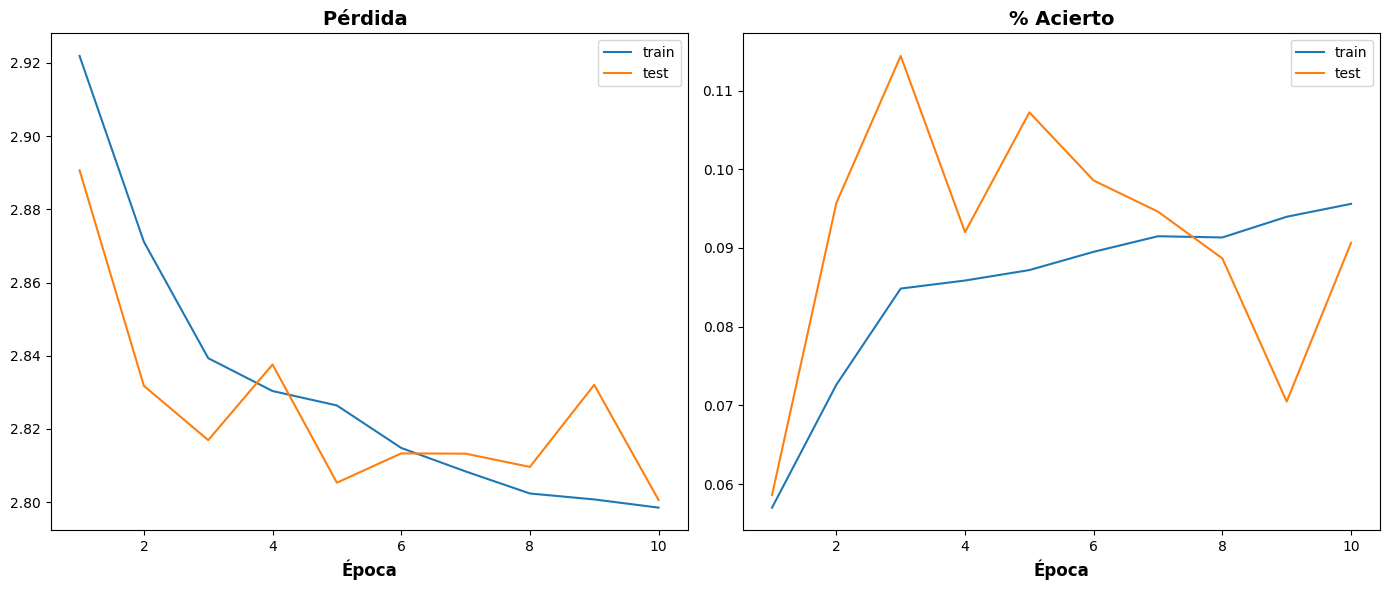

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist.history['loss']) + 1)

axs[0].plot(epoca1, hist.history['loss'], label="train")
axs[0].plot(epoca1, hist.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist.history['accuracy'], label="train")
axs[1].plot(epoca1, hist.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [35]:
a = {
    'Métrica': list(hist.history.keys()),
    'PrimeraRed': [hist.history[k][-1] for k in hist.history],
}

b = pd.DataFrame(a)

display(b)

,Métrica,Modelo 1
0,accuracy,0.095603
1,loss,2.798512
2,precision,0.549419
3,recall,0.005844
4,val_accuracy,0.090651
5,val_loss,2.800616
6,val_precision,0.000000
7,val_recall,0.000000


*pequeñas conclu

## Modelo 2

Modelo CNN 1

Cambio: Menos capas ocultas y dropout, y agregacion de 3 conv y pool

In [17]:
PrimeraRedMejorada = keras.Sequential(name="CNN_Mejorada")
PrimeraRedMejorada.add(Input(shape=(64, 64, 3), name="entrada"))

PrimeraRedMejorada.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_1"))

PrimeraRedMejorada.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_2"))

PrimeraRedMejorada.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
PrimeraRedMejorada.add(MaxPooling2D((2, 2), name="pooling_3"))

PrimeraRedMejorada.add(Flatten(name="flatten_1"))

PrimeraRedMejorada.add(Dropout(0.4, name="dropout_1"))
PrimeraRedMejorada.add(Dense(256, activation='relu', name="CapaOculta_1"))
PrimeraRedMejorada.add(Dropout(0.4, name="dropout_2"))
PrimeraRedMejorada.add(Dense(128, activation='relu', name="CapaOculta_2"))
PrimeraRedMejorada.add(Dropout(0.3, name="dropout_3"))
PrimeraRedMejorada.add(Dense(18, activation='softmax', name="salida"))

PrimeraRedMejorada.summary()

Model: "CNN_Mejorada"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,225,874 (8.49 MB)

 Trainable params: 2,225,874 (8.49 MB)

 Non-trainable params: 0 (0.00 B)

In [18]:
np.random.seed(29)
tf.random.set_seed(29)

PrimeraRedMejorada.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist2 = PrimeraRedMejorada.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 22s 14ms/step - accuracy: 0.2411 - loss: 2.4188 - precision: 0.5752 - recall: 0.0863 - val_accuracy: 0.6621 - val_loss: 1.1416 - val_precision: 0.8917 - val_recall: 0.4937
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 8ms/step - accuracy: 0.6403 - loss: 1.1831 - precision: 0.8398 - recall: 0.4995 - val_accuracy: 0.7896 - val_loss: 0.6877 - val_precision: 0.9081 - val_recall: 0.6990
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.7588 - loss: 0.7984 - precision: 0.8825 - recall: 0.6693 - val_accuracy: 0.8283 - val_loss: 0.5725 - val_precision: 0.9138 - val_recall: 0.7630
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 7ms/step - accuracy: 0.8116 - loss: 0.6112 - precision: 0.8958 - recall: 0.7445 - val_accuracy: 0.8539 - val_loss: 0.4813 - val_precision: 0.9220 - val_recall: 0.8024
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8478 - loss: 0.5019 - precision: 0.9168 - recall: 0.7961 - val_accuracy: 0.8703 

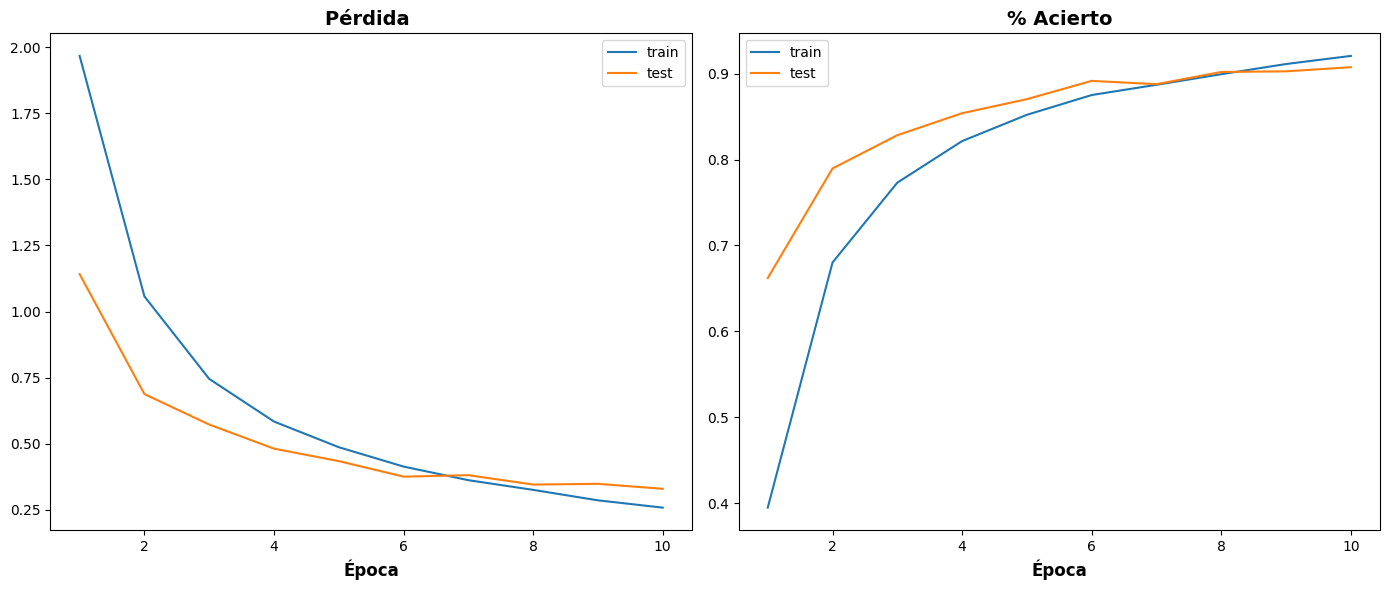

In [19]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist2.history['loss']) + 1)

axs[0].plot(epoca1, hist2.history['loss'], label="train")
axs[0].plot(epoca1, hist2.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist2.history['accuracy'], label="train")
axs[1].plot(epoca1, hist2.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [37]:
c = {
    'Métrica': list(hist2.history.keys()),
    'PrimeraRed': [hist2.history[k][-1] for k in hist.history],
}

d = pd.DataFrame(c)

display(d)

,Métrica,PrimeraRed
0,accuracy,0.920599
1,loss,0.258110
2,precision,0.946956
3,recall,0.900284
4,val_accuracy,0.907494
5,val_loss,0.329355
6,val_precision,0.943777
7,val_recall,0.884368


*pequeñas conclu

###Modelo 3 / prueba batch notmalizacion

Modelo CNN2

Se mantiene arquitectura anterior y se agrega Batch Normalization

In [21]:
SegundaRedMejorada = keras.Sequential(name="CNN_Mejorada2")
SegundaRedMejorada.add(Input(shape=(64, 64, 3), name="entrada"))

SegundaRedMejorada.add(Conv2D(32, (3, 3), activation='relu', padding='same', name="convolucion_1"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_1"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_1"))

SegundaRedMejorada.add(Conv2D(64, (3, 3), activation='relu', padding='same', name="convolucion_2"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_2"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_2"))

SegundaRedMejorada.add(Conv2D(128, (3, 3), activation='relu', padding='same', name="convolucion_3"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_3"))
SegundaRedMejorada.add(MaxPooling2D((2, 2), name="pooling_3"))

SegundaRedMejorada.add(Flatten(name="Flatten"))

SegundaRedMejorada.add(Dropout(0.4, name="dropout_1"))
SegundaRedMejorada.add(Dense(256, activation='relu', name="CapaOculta_1"))
SegundaRedMejorada.add(BatchNormalization(name="batchNormalization_4"))
SegundaRedMejorada.add(Dropout(0.4, name="dropout_2"))
SegundaRedMejorada.add(Dense(128, activation='relu', name="CapaOculta_2"))
SegundaRedMejorada.add(Dropout(0.3, name="dropout_3"))
SegundaRedMejorada.add(Dense(18, activation='softmax', name="salida"))

SegundaRedMejorada.summary()

Model: "CNN_Mejorada2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ convolucion_1 (Conv2D)          │ (None, 64, 64, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_1            │ (None, 64, 64, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_1 (MaxPooling2D)        │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_2 (Conv2D)          │ (None, 32, 32, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_2            │ (None, 32, 32, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_2 (MaxPooling2D)        │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ convolucion_3 (Conv2D)          │ (None, 16, 16, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_3            │ (None, 16, 16, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ pooling_3 (MaxPooling2D)        │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ Flatten (Flatten)               │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 8192)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_1 (Dense)            │ (None, 256)            │     2,097,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batchNormalization_4            │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ CapaOculta_2 (Dense)            │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ salida (Dense)                  │ (None, 18)             │         2,322 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,227,794 (8.50 MB)

 Trainable params: 2,226,834 (8.49 MB)

 Non-trainable params: 960 (3.75 KB)

In [22]:
np.random.seed(29)
tf.random.set_seed(29)

SegundaRedMejorada.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy', 'precision', 'recall']
)

hist3 = SegundaRedMejorada.fit(
    X_train, y_train,
    batch_size=32,
    epochs=10,
    validation_data=(X_val,y_val)
)

Epoch 1/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.3329 - loss: 2.3566 - precision: 0.5502 - recall: 0.1785 - val_accuracy: 0.6606 - val_loss: 1.1398 - val_precision: 0.8486 - val_recall: 0.5025
Epoch 2/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.6578 - loss: 1.1341 - precision: 0.8228 - recall: 0.5405 - val_accuracy: 0.7297 - val_loss: 0.9105 - val_precision: 0.8540 - val_recall: 0.6415
Epoch 3/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.7698 - loss: 0.7494 - precision: 0.8737 - recall: 0.6972 - val_accuracy: 0.6629 - val_loss: 1.3361 - val_precision: 0.7306 - val_recall: 0.6234
Epoch 4/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - accuracy: 0.8272 - loss: 0.5612 - precision: 0.8977 - recall: 0.7784 - val_accuracy: 0.8107 - val_loss: 0.6089 - val_precision: 0.8892 - val_recall: 0.7606
Epoch 5/10
1011/1011 ━━━━━━━━━━━━━━━━━━━━ 9s 9ms/step - accuracy: 0.8653 - loss: 0.4343 - precision: 0.9158 - recall: 0.8308 - val_accuracy: 0.8793 - 

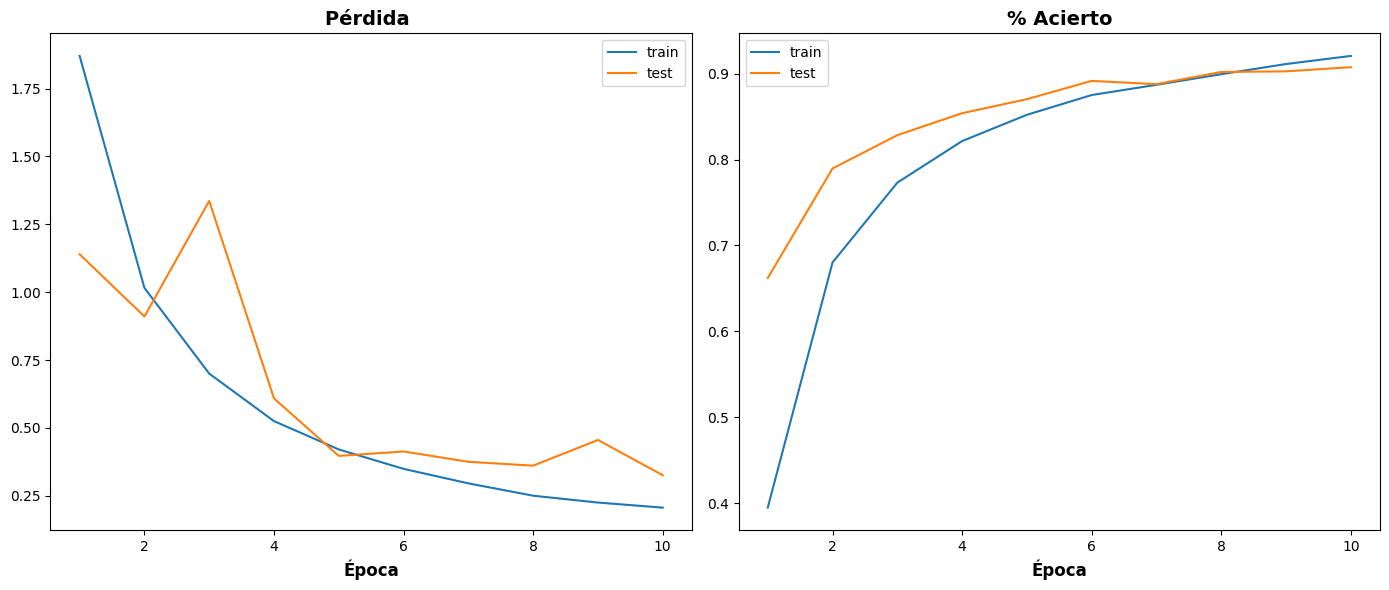

In [23]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))
epoca1 = range(1, len(hist2.history['loss']) + 1)

axs[0].plot(epoca1, hist3.history['loss'], label="train")
axs[0].plot(epoca1, hist3.history['val_loss'], label="test")
axs[0].set_title('Pérdida ', fontsize=14, fontweight="bold")
axs[0].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[0].legend()

# Graficar el % de acierto
axs[1].plot(epoca1, hist2.history['accuracy'], label="train")
axs[1].plot(epoca1, hist2.history['val_accuracy'], label="test")
axs[1].set_title('% Acierto', fontsize=14, fontweight="bold")
axs[1].set_xlabel('Época', fontsize=12, fontweight="bold")
axs[1].legend()

# Mostrar los gráficos
plt.tight_layout()  # Ajusta el espaciado para que no se solapen los gráficos
plt.show()

In [38]:
e = {
    'Métrica': list(hist3.history.keys()),
    'PrimeraRed': [hist3.history[k][-1] for k in hist.history],
}

f = pd.DataFrame(e)

display(f)

,Métrica,PrimeraRed
0,accuracy,0.934636
1,loss,0.206351
2,precision,0.951093
3,recall,0.921186
4,val_accuracy,0.907123
5,val_loss,0.325824
6,val_precision,0.936704
7,val_recall,0.891294


*pequeñas conclu

##Comparacion modelos

In [24]:
modelo1 = {
    'Nombre': 'PrimeraRed',
    'Capas Convolucionales': 'No',
    'Capas MaxPooling': 'No',
    'Barch Normalization': 'No',
    'Capas Ocultas': '5 (512, 256, 128, 64 y 32)',
    'Dropout': '5 (4 de 0.3 y 1 de 0.35)',
    'Train Accuracy': hist.history['accuracy'][-1],
    'Validation Accuracy': hist.history['val_accuracy'][-1],
    'Train Loss': hist.history['loss'][-1],
    'Validation Loss': hist.history['val_loss'][-1]}

modelo2 = {
    'Nombre': 'PrimeraRedMejorada',
    'Capas Convolucionales': '3 (32, 64 y 128, 3x3)',
    'Capas MaxPooling': '3 (2x2)',
    'Barch Normalization': 'No',
    'Capas Ocultas': '2 (256, 128)',
    'Dropout': '3 (2 de 0.4 y 1 de 0.3)',
    'Train Accuracy': hist2.history['accuracy'][-1],
    'Validation Accuracy': hist2.history['val_accuracy'][-1],
    'Train Loss': hist2.history['loss'][-1],
    'Validation Loss': hist2.history['val_loss'][-1]}

modelo3 = {
    'Nombre': 'SegundaRedMejorada',
    'Capas Convolucionales': '3 (32, 64 y 128, 3x3)',
    'Capas MaxPooling': '3 (2x2)',
    'Barch Normalization': '4',
    'Capas Ocultas': '2 (256, 128)',
    'Dropout': '3 (2 de 0.4 y 1 de 0.3)',
    'Train Accuracy': hist3.history['accuracy'][-1],
    'Validation Accuracy': hist3.history['val_accuracy'][-1],
    'Train Loss': hist3.history['loss'][-1],
    'Validation Loss': hist3.history['val_loss'][-1]}

modelos = pd.DataFrame([modelo1, modelo2, modelo3])

modelos

,Nombre,Capas Convolucionales,Capas MaxPooling,Barch Normalization,Capas Ocultas,Dropout,Train Accuracy,Validation Accuracy,Train Loss,Validation Loss
0,PrimeraRed,No,No,No,"5 (512, 256, 128, 64 y 32)",5 (4 de 0.3 y 1 de 0.35),0.095603,0.090651,2.798512,2.800616
1,PrimeraRedMejorada,"3 (32, 64 y 128, 3x3)",3 (2x2),No,"2 (256, 128)",3 (2 de 0.4 y 1 de 0.3),0.920599,0.907494,0.258110,0.329355
2,SegundaRedMejorada,"3 (32, 64 y 128, 3x3)",3 (2x2),4,"2 (256, 128)",3 (2 de 0.4 y 1 de 0.3),0.934636,0.907123,0.206351,0.325824


*Intente hacer tu grafico bonito pero no me salio asi que se lo pedi a la IA

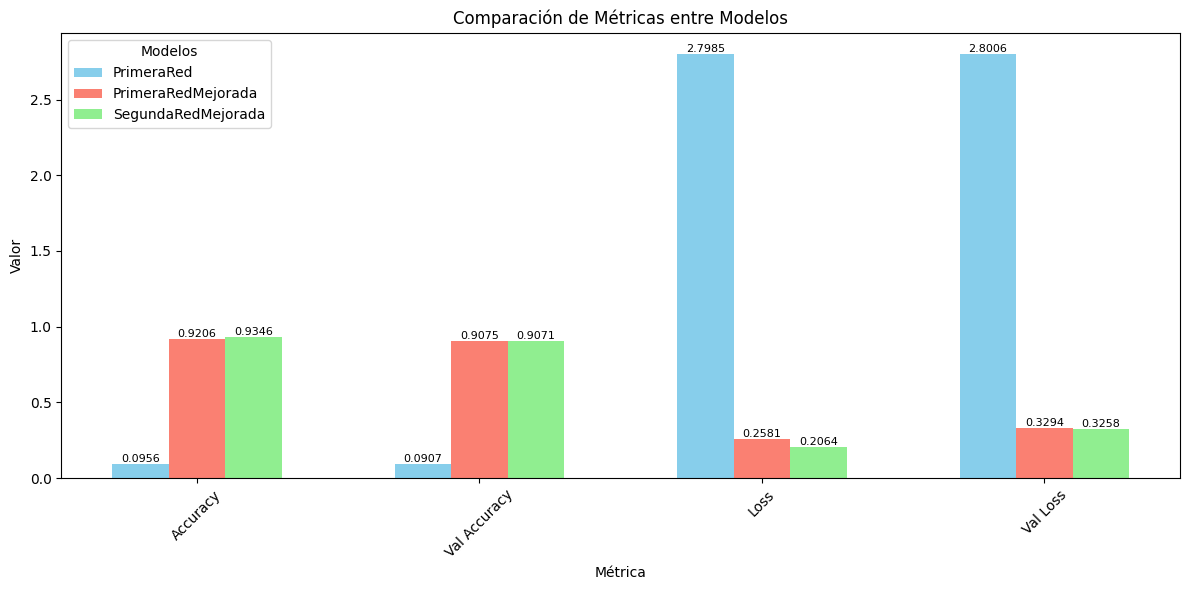

In [34]:
import pandas as pd
import matplotlib.pyplot as plt

# Extraer las métricas de cada modelo
m1 = hist.history
m2 = hist2.history
m3 = hist3.history

# Nombres de los modelos
n1 = 'PrimeraRed'
n2 = 'PrimeraRedMejorada'
n3 = 'SegundaRedMejorada'

# Crear DataFrame de comparación
comparacion_modelos = pd.DataFrame({
    'Métrica': ['Accuracy', 'Val Accuracy', 'Loss', 'Val Loss'],
    n1: [m1['accuracy'][-1], m1['val_accuracy'][-1], m1['loss'][-1], m1['val_loss'][-1]],
    n2: [m2['accuracy'][-1], m2['val_accuracy'][-1], m2['loss'][-1], m2['val_loss'][-1]],
    n3: [m3['accuracy'][-1], m3['val_accuracy'][-1], m3['loss'][-1], m3['val_loss'][-1]],
})

# Configuración del gráfico
plt.figure(figsize=(12, 6))
bar_width = 0.2
index = range(len(comparacion_modelos))

# Dibujar las barras para cada modelo
bars1 = plt.bar([i - bar_width for i in index], comparacion_modelos[n1], bar_width, label=n1, color='skyblue')
bars2 = plt.bar(index, comparacion_modelos[n2], bar_width, label=n2, color='salmon')
bars3 = plt.bar([i + bar_width for i in index], comparacion_modelos[n3], bar_width, label=n3, color='lightgreen')

# Añadir etiquetas encima de cada barra
def add_labels(bars):
    for bar in bars:
        height = bar.get_height()
        plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=8)

add_labels(bars1)
add_labels(bars2)
add_labels(bars3)

# Etiquetas y título
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Comparación de Métricas entre Modelos')
plt.xticks(index, comparacion_modelos['Métrica'], rotation=45)
plt.legend(title='Modelos')
plt.tight_layout()
plt.show()


Validación Accuracy (la más importante): Esto indica cómo de bien generaliza el modelo a datos nuevos.

Ganador en validación accuracy: SegundaRedMejorada, aunque PrimeraRedMejora esta muy cerca con una diferencia de 0.0010.

Validación Loss: Esto mide el error real, penaliza más si las predicciones están lejos.

Ganador en validación Loss: PrimeraRedMejorada, aunque SegundaRedMejorada tiene mejor accuracy, su loss es ligeramente más alto. Pero la diferencia es mínima de un 0.02.

Overfitting (Sobreentrenamiento): Si Train Accuracy está muy por encima de Validation Accuracy, hay overfitting, lo que buscamo minimizar lo mas posible

Diferencias entre accuracys

PrimeraRed	0.7496 y	0.7409	= 0.0087 (pequeño overfitting)

PrimeraRedMejorada	0.9066 y	0.9116	= -0.005 (el mejor generalizando)

SegundaRedMejorada	0.9408 y	0.9126	= 0.0282 (medio/alto overfitting)

Ganador en menos Overfitting: PrimeraRedMejorada.

Conclusión Final:

El mejor modelo en esta comparación es PrimeraRedMejorada, porque tiene una diferencia minima en la validacion accuracy y menor perdida, ademas de casi nadad de overfitting.

##Mejor modelo

In [ ]:
PrimeraRedMejorada.save("PrimeraRedMejorada.keras")

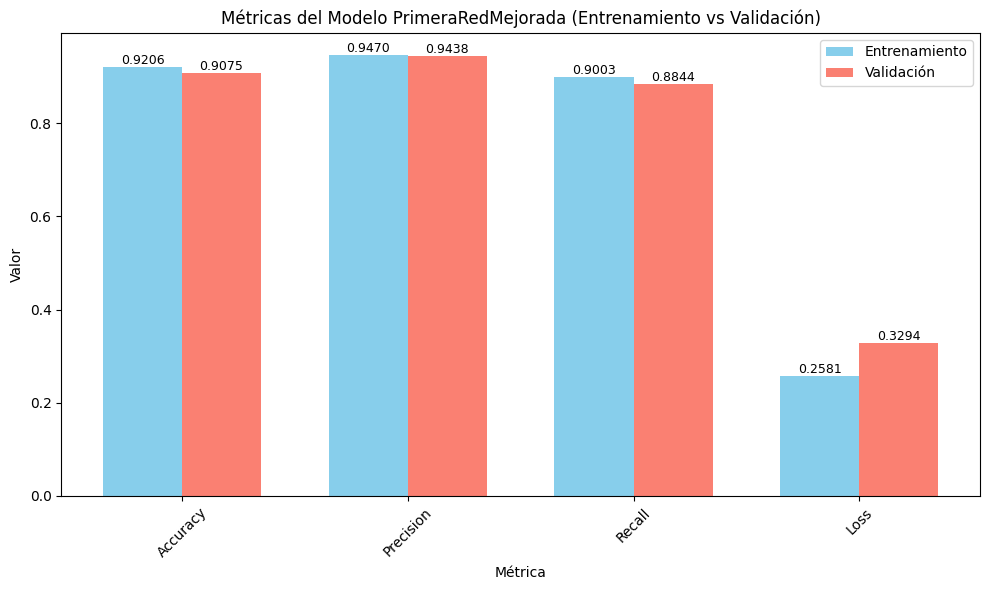

In [40]:
# Crear DataFrame con métricas incluyendo loss
metrics_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision', 'Recall', 'Loss'],
    'Entrenamiento': [
        hist2.history['accuracy'][-1],
        hist2.history['precision'][-1],
        hist2.history['recall'][-1],
        hist2.history['loss'][-1]
    ],
    'Validación': [
        hist2.history['val_accuracy'][-1],
        hist2.history['val_precision'][-1],
        hist2.history['val_recall'][-1],
        hist2.history['val_loss'][-1]
    ]
})

# Configurar gráfico
plt.figure(figsize=(10, 6))
bar_width = 0.35
index = range(len(metrics_df))

# Dibujar las barras
bars1 = plt.bar(index, metrics_df['Entrenamiento'], bar_width, label='Entrenamiento', color='skyblue')
bars2 = plt.bar([i + bar_width for i in index], metrics_df['Validación'], bar_width, label='Validación', color='salmon')

# Etiquetas encima de las barras
for bar in bars1 + bars2:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.4f}', ha='center', va='bottom', fontsize=9)

# Etiquetas del eje x y configuración
plt.xlabel('Métrica')
plt.ylabel('Valor')
plt.title('Métricas del Modelo PrimeraRedMejorada (Entrenamiento vs Validación)')
plt.xticks([i + bar_width / 2 for i in index], metrics_df['Métrica'], rotation=45)
plt.legend()
plt.tight_layout()

# Mostrar gráfico
plt.show()


*Concluciones

## Predicciones

In [25]:
from tensorflow.keras.models import load_model

cargarmodel = load_model('PrimeraRedMejorada.keras')

prediccion = cargarmodel.evaluate(X_test, y_test)

28/28 ━━━━━━━━━━━━━━━━━━━━ 3s 49ms/step - accuracy: 0.9704 - loss: 0.1161 - precision: 0.9808 - recall: 0.9610


Lo de abajo es copiado del chat pq la wea se me veia un cuadro ql negro wn

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 744ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


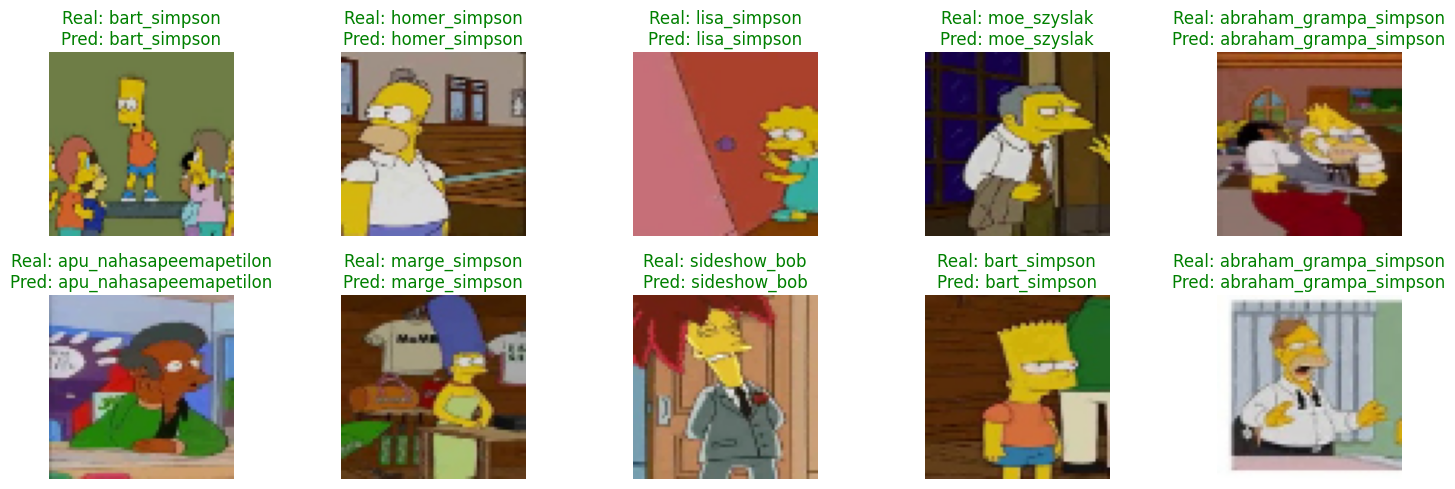

In [26]:
num_images = 10
plt.figure(figsize=(15, 5))
for i in range(num_images):
    plt.subplot(2, 5, i+1)
    plt.imshow(cv2.cvtColor((X_test[i] * 255).astype("uint8"), cv2.COLOR_BGR2RGB))
    plt.axis('off')
    # Get the index of the true class using argmax
    true_class_index = np.argmax(y_test[i])
    # Get predicted class by finding the index of the maximum probability
    pred_class_index = np.argmax(cargarmodel.predict(X_test[i:i+1])[0])
    # Fetch labels using class indices
    true_label = MAP_CHARACTERS[true_class_index]
    pred_label = MAP_CHARACTERS[pred_class_index]
    color = "green" if true_class_index == pred_class_index else "red"
    plt.title(f"Real: {true_label}\nPred: {pred_label}", color=color)
plt.tight_layout()
plt.show()